In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veri setini oku
veri_seti = pd.read_excel('arcgis_ngas_usak_v02.xlsx')


# Verilerin standardizasyonunu yap
scaler = StandardScaler()
standardize_veri = scaler.fit_transform(veri_seti)

# Standardize edilmiş veriyi yeni bir DataFrame'e dönüştür
standardize_veri_df = pd.DataFrame(standardize_veri, columns=veri_seti.columns)

# Yeni Excel dosyasına kaydet
standardize_veri_df.to_excel('standardize_edilmis_veri.xlsx', index=False)


In [10]:
import pandas as pd

# Veri setini yükleme
veri = pd.read_excel('standardize_edilmis_veri.xlsx')

# Yeni özellik oluşturma: Kredi Kartı Limiti / Gelir
veri['Yaz_Fiyatlari'] = (veri['Jun usd/tr'] + veri['Jul usd/tr'] + veri['Aug usd/tr']) / 3
veri['kiş_Fiyatlari'] = (veri['Dec usd/tr'] + veri['Jan usd/tr'] + veri['Feb usd/tr']) / 3
veri['ilkbahar_Fiyatlari'] = (veri['Mar usd/tr'] + veri['Apr usd/tr'] + veri['May usd/tr']) / 3
veri['Sonbahar_Fiyatlari'] = (veri['Sep usd/tr'] + veri['Oct usd/tr'] + veri['Nov usd/tr']) / 3
veri.to_csv('yeni_ozellik_veriseti.csv', index=False)
# Yeni özellikle birlikte güncellenmiş veri setini gösterme
print(veri.head())

       Year  Jan usd/tr  Feb usd/tr  Mar usd/tr  Apr usd/tr  May usd/tr  \
0 -1.486283    -1.62306   -1.588964   -1.517793   -1.299759   -1.118313   
1 -1.486283    -1.62306   -1.588964   -1.517793   -1.299759   -1.118313   
2 -1.486283    -1.62306   -1.588964   -1.517793   -1.299759   -1.118313   
3 -1.486283    -1.62306   -1.588964   -1.517793   -1.299759   -1.118313   
4 -1.486283    -1.62306   -1.588964   -1.517793   -1.299759   -1.118313   

   Jun usd/tr  Jul usd/tr  Aug usd/tr  Sep usd/tr  ...       Aug       Sep  \
0   -1.140826   -1.079852   -1.017811   -0.770131  ... -0.136589 -0.147195   
1   -1.140826   -1.079852   -1.017811   -0.770131  ... -0.136589 -0.147195   
2   -1.140826   -1.079852   -1.017811   -0.770131  ... -0.136589 -0.147195   
3   -1.140826   -1.079852   -1.017811   -0.770131  ... -0.136589 -0.147195   
4   -1.140826   -1.079852   -1.017811   -0.770131  ... -0.136589 -0.147195   

       Oct       Nov      Dec   Total  Yaz_Fiyatlari  kiş_Fiyatlari  \
0 -0.1815

In [18]:
import pandas as pd

# Veri setini yükleme
veri = pd.read_csv('yeni_ozellik_veriseti.csv')

# Tüm verilerin istatistiksel bilgilerini almak
istatistikler = veri.describe()

# İstatistiksel bilgileri ekrana yazdırma
print(istatistikler)


               Year    Jan usd/tr    Feb usd/tr    Mar usd/tr    Apr usd/tr  \
count  2.316230e+05  2.316230e+05  2.316230e+05  2.316230e+05  2.316230e+05   
mean   3.607972e-14  1.602060e-15  1.341921e-15 -9.109750e-16 -2.689732e-15   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.486283e+00 -1.623060e+00 -1.588964e+00 -1.517793e+00 -1.299759e+00   
25%   -5.848760e-01 -5.133233e-01 -6.054077e-01 -6.824309e-01 -9.078389e-01   
50%    3.165315e-01  5.858232e-01  8.235088e-01  6.619073e-01  5.563572e-01   
75%    1.217939e+00  1.015746e+00  8.559019e-01  1.008473e+00  1.129646e+00   
max    1.217939e+00  1.015746e+00  8.559019e-01  1.008473e+00  1.129646e+00   

         May usd/tr    Jun usd/tr    Jul usd/tr    Aug usd/tr    Sep usd/tr  \
count  2.316230e+05  2.316230e+05  2.316230e+05  2.316230e+05  2.316230e+05   
mean   7.656902e-16 -1.615803e-15 -9.973606e-16 -2.096813e-15 -2.179272e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.

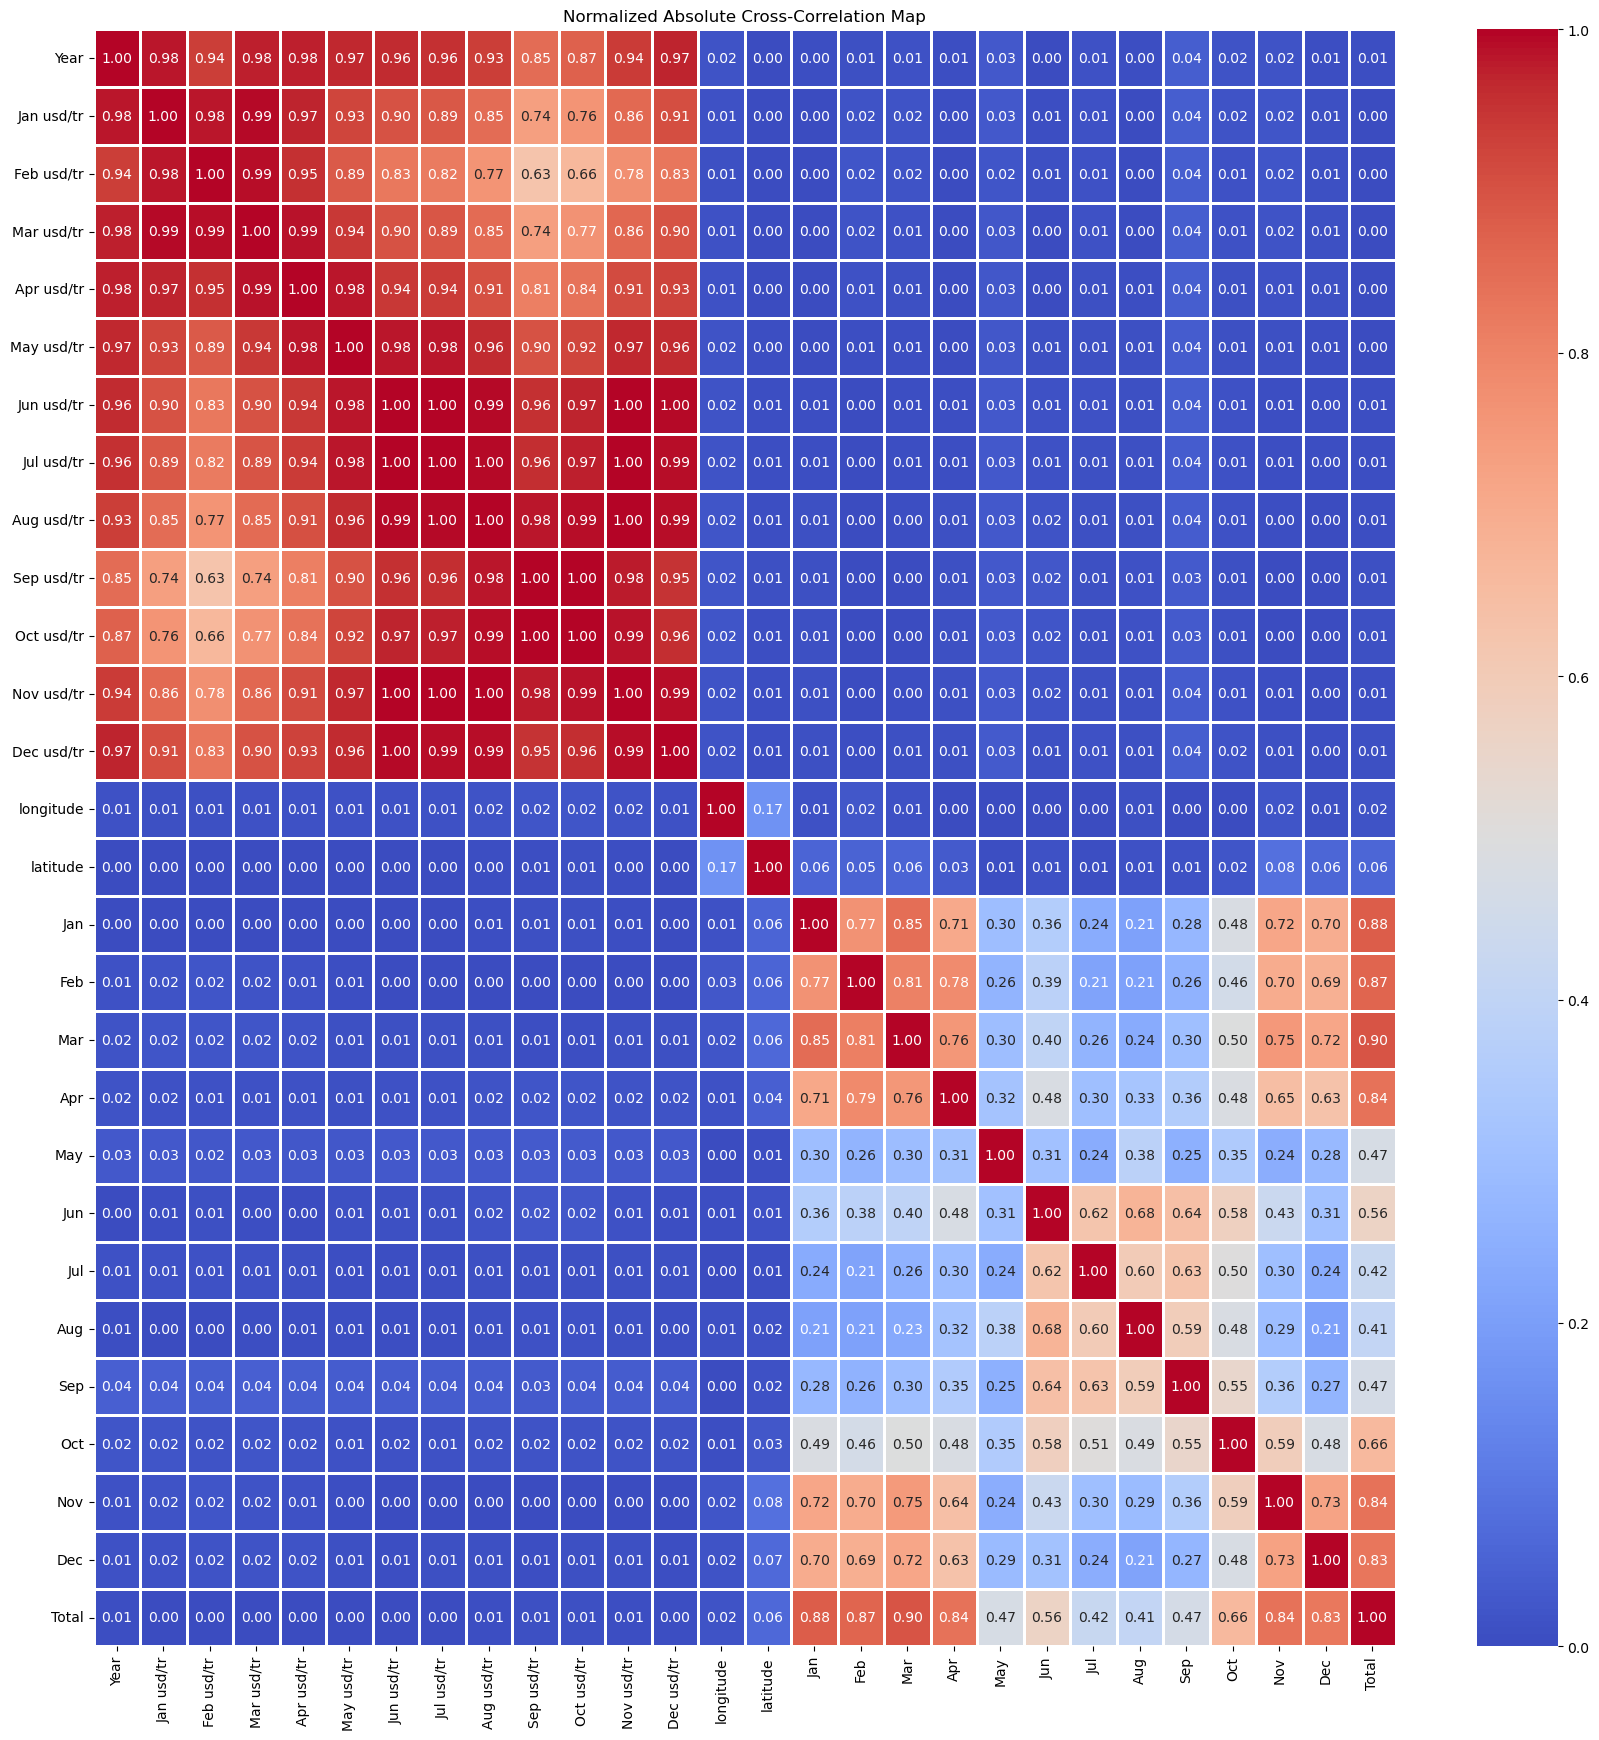

In [26]:
import pandas,numpy,seaborn
import matplotlib.pyplot as plot

dataset = pandas.read_excel('arcgis_ngas_usak_v02.xlsx')

correlation_of_dataset = dataset.corr()

absolute_of_corr = numpy.abs(correlation_of_dataset)
normalized_corr = (absolute_of_corr - absolute_of_corr.min()) / (absolute_of_corr.max() - absolute_of_corr.min())

plot.figure(figsize=(21,21))
seaborn.heatmap(normalized_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f', annot_kws={'size':10}, linewidth=.9)
plot.title('Normalized Absolute Cross-Correlation Map')
plot.show()

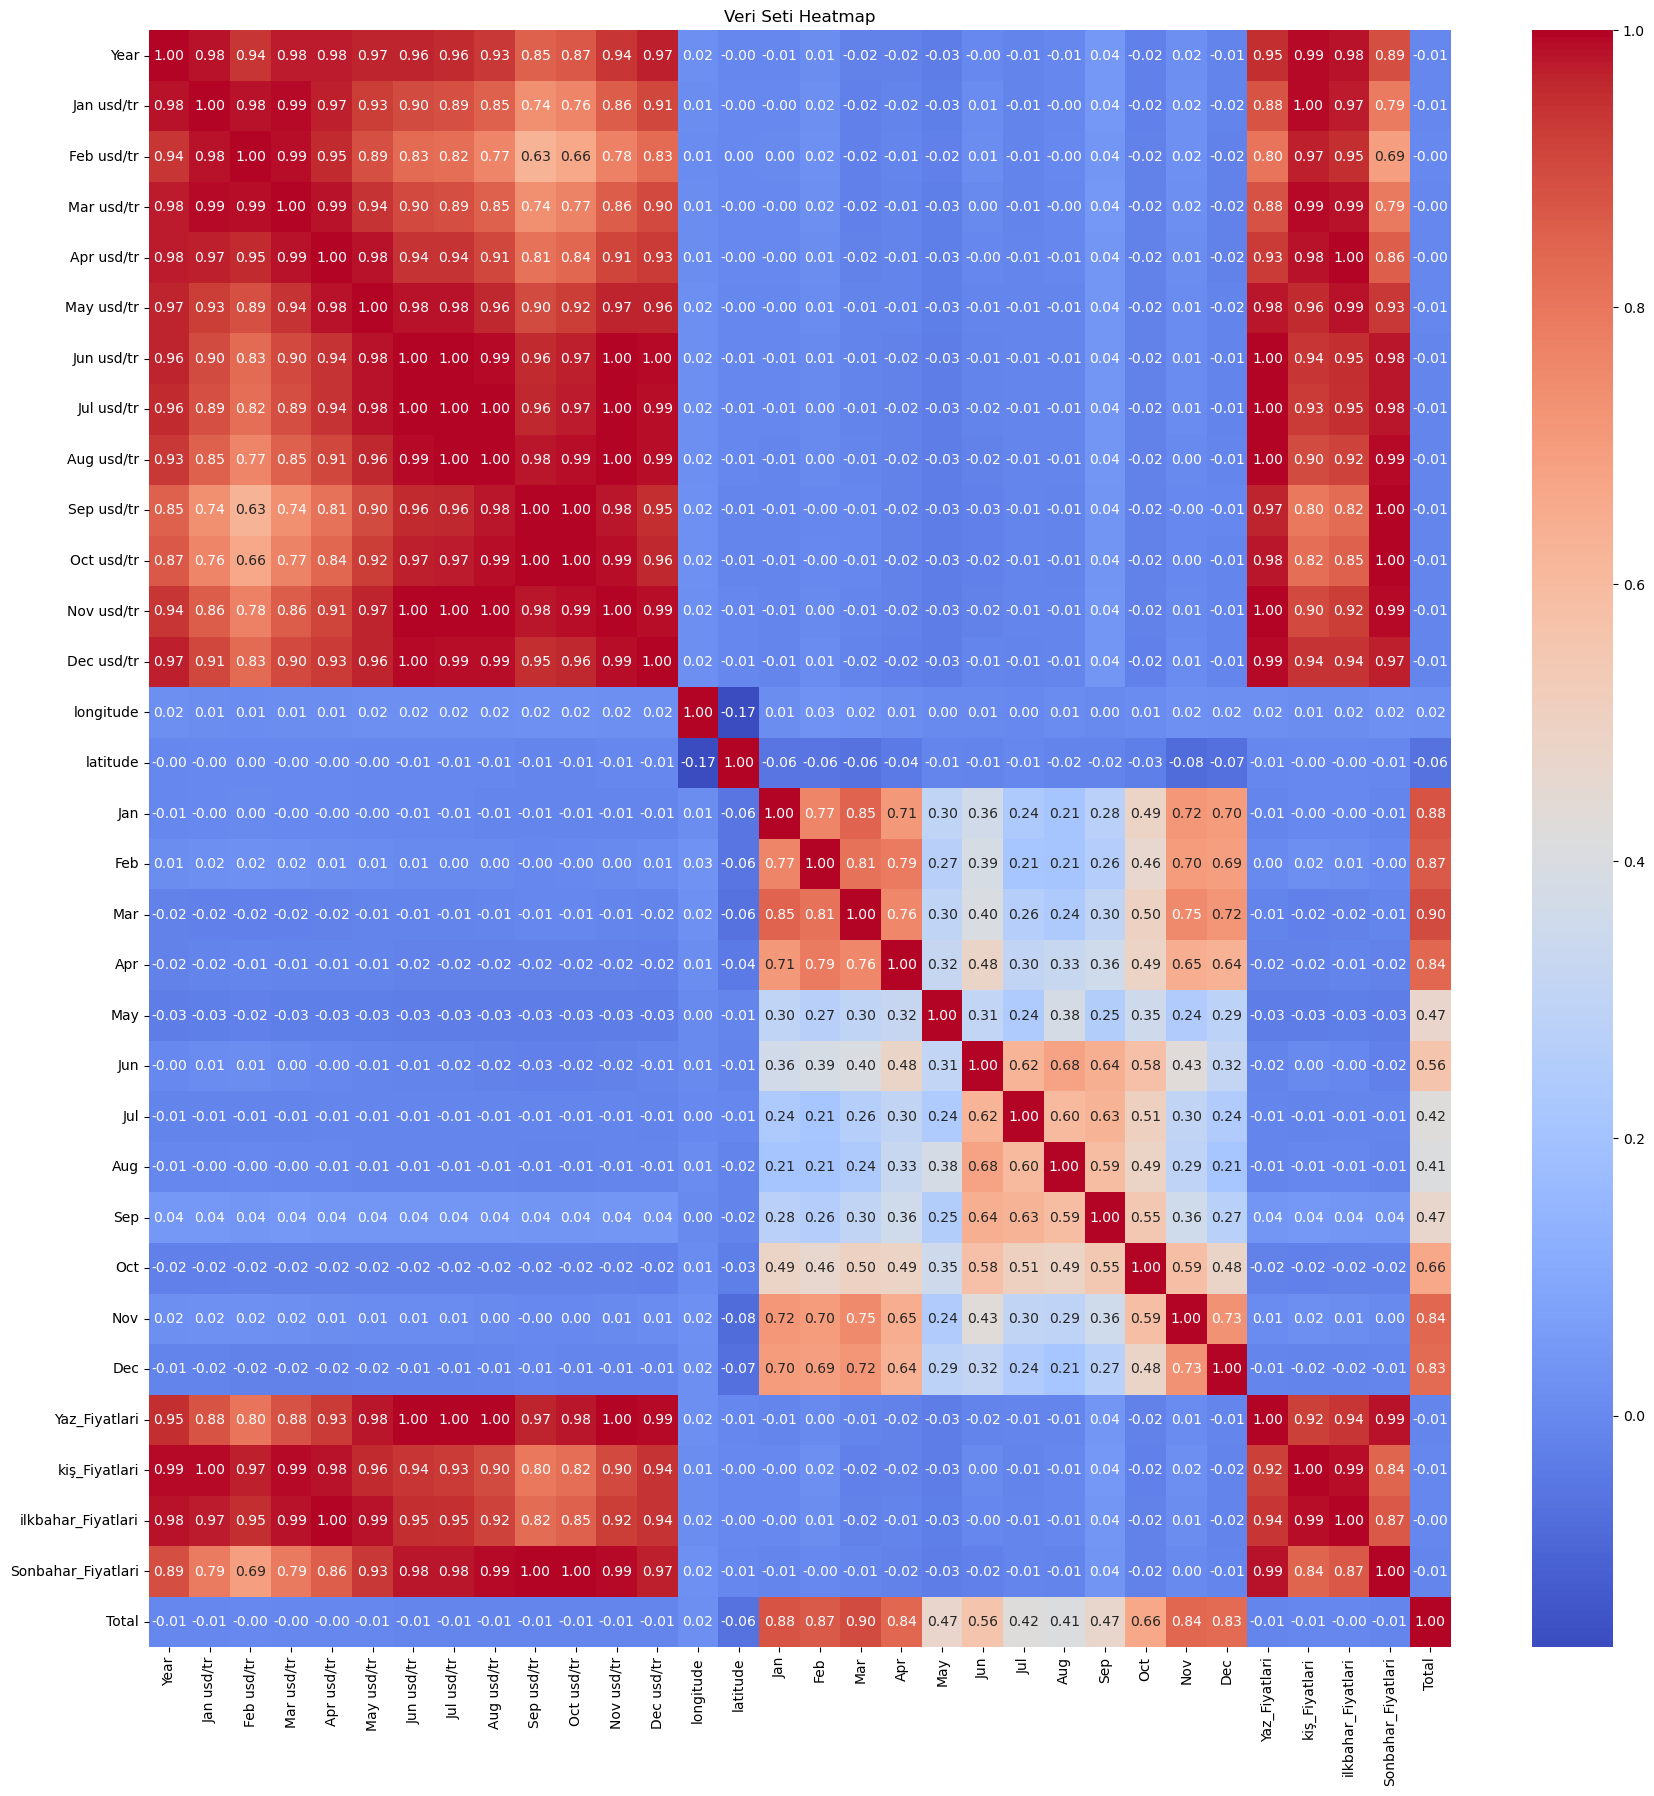

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini Excel dosyasından oku
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Heatmap'i oluşturmak için korelasyon matrisini hesapla
correlation_matrix = data.corr()

# Heatmap'i çiz
plt.figure(figsize=(21, 21))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Veri Seti Heatmap')
plt.show()


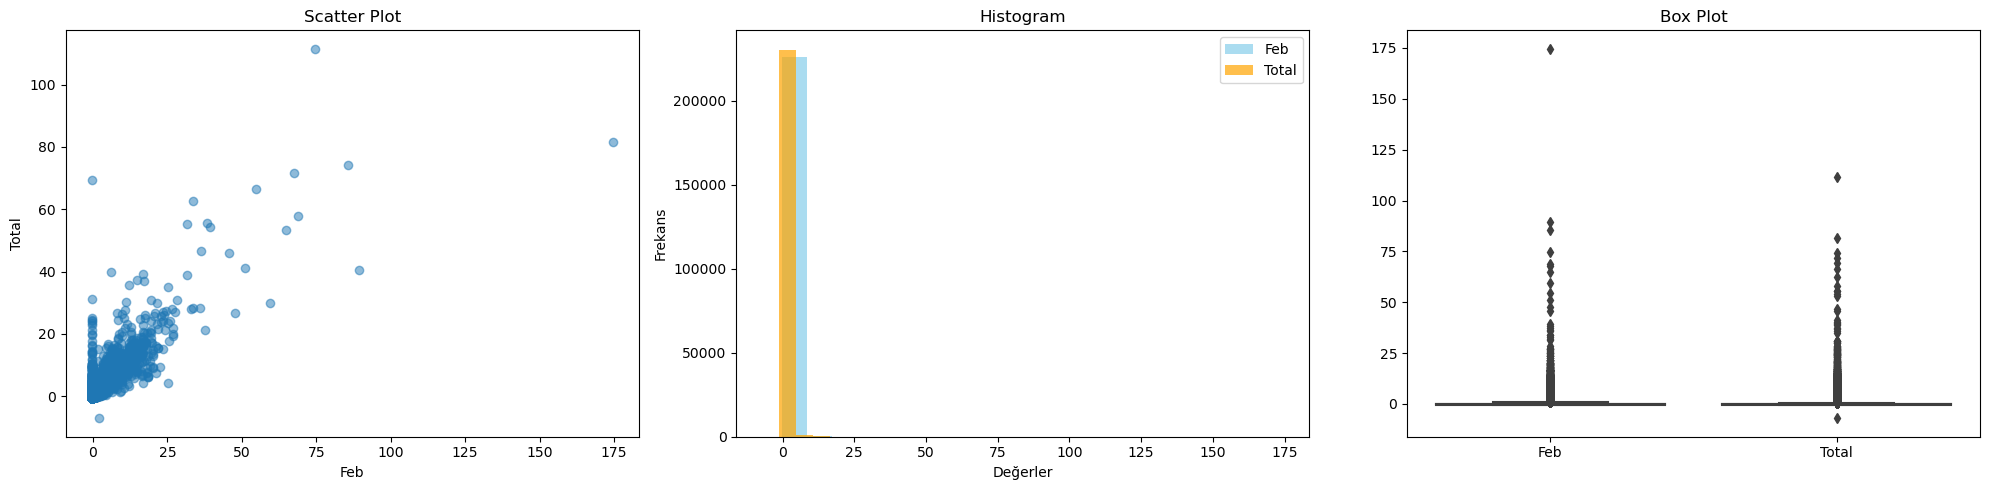

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Feb'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Feb')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Feb'], bins=20, color='skyblue', alpha=0.7, label='Feb')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Feb', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


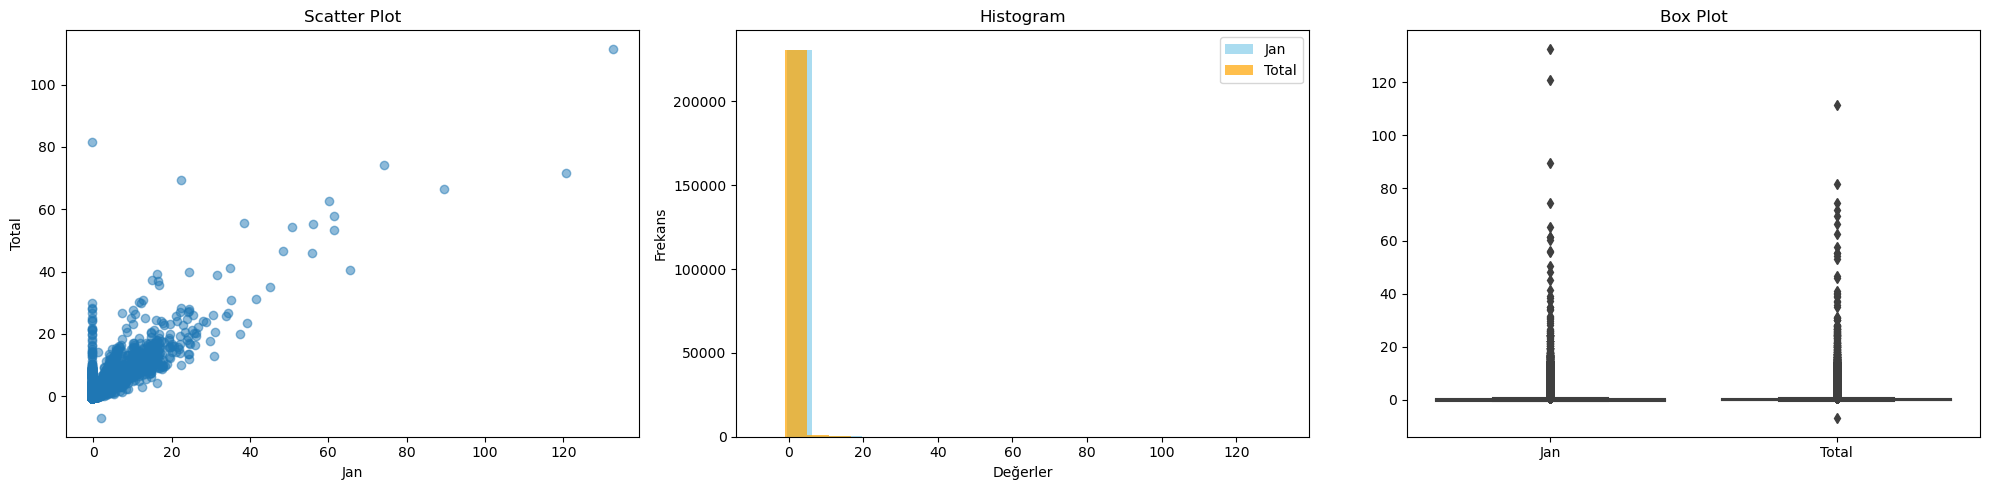

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Jan'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Jan')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Jan'], bins=20, color='skyblue', alpha=0.7, label='Jan')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Jan', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


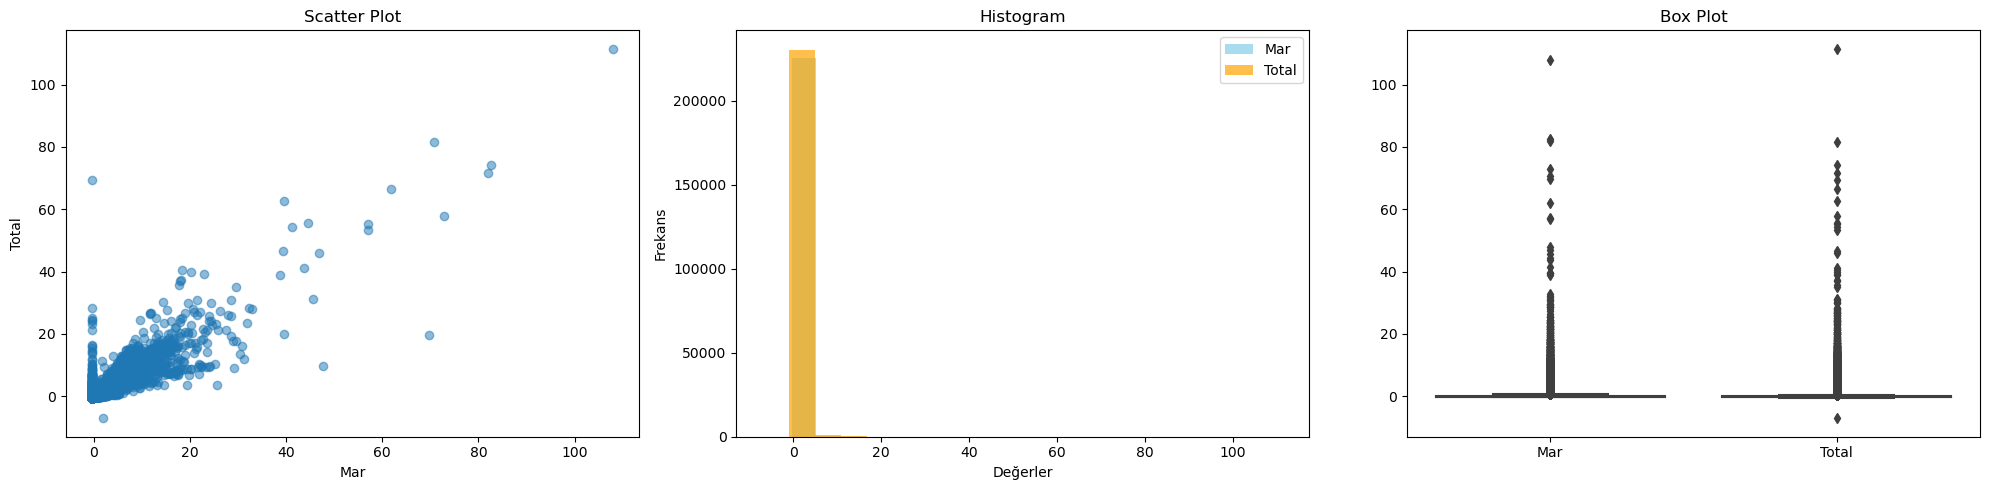

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Mar'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Mar')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Mar'], bins=20, color='skyblue', alpha=0.7, label='Mar')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Mar', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


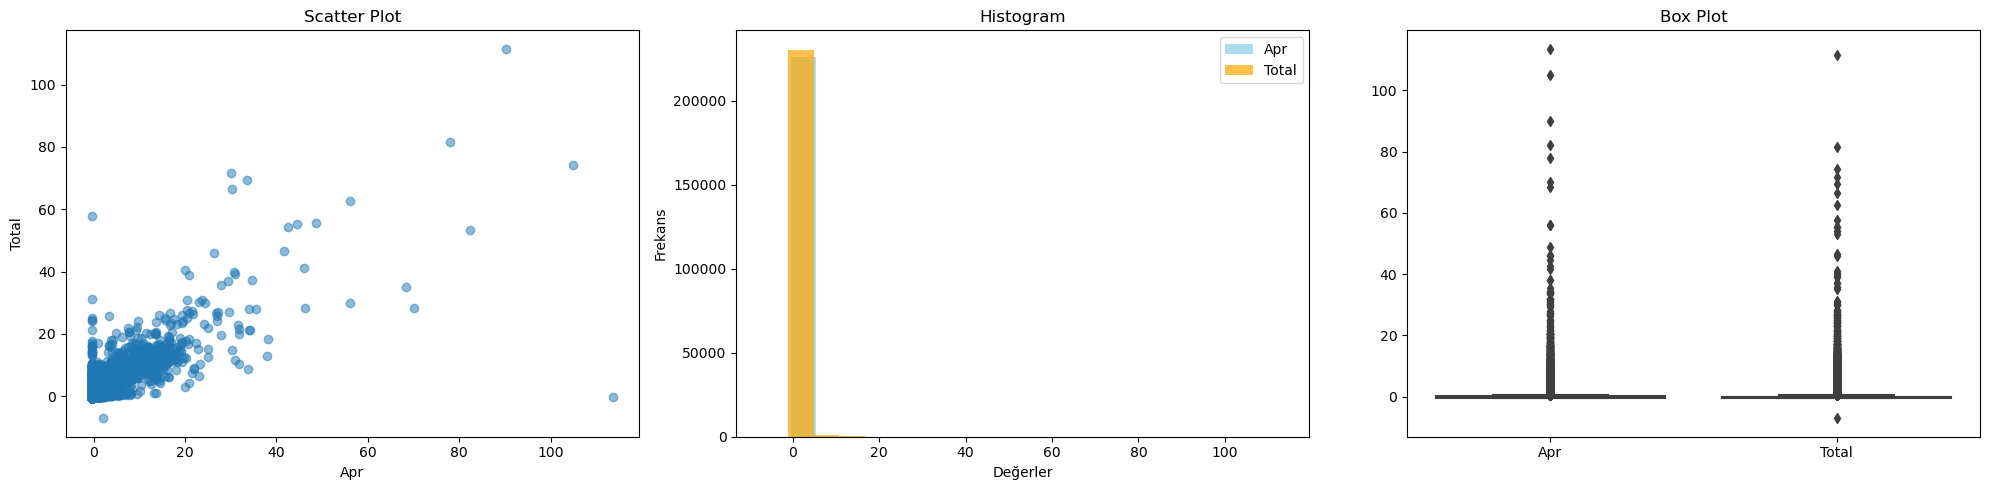

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Apr'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Apr')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Apr'], bins=20, color='skyblue', alpha=0.7, label='Apr')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Apr', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


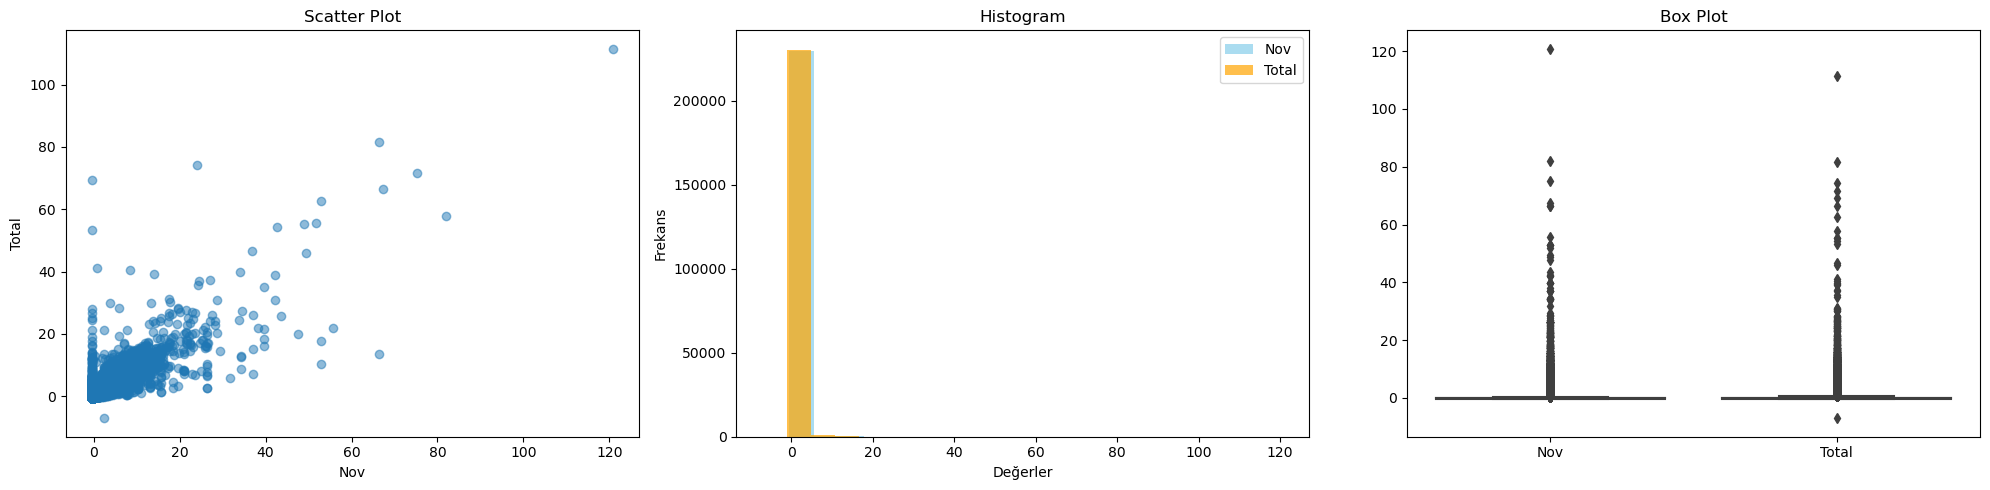

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Nov'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Nov')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Nov'], bins=20, color='skyblue', alpha=0.7, label='Nov')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Nov', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


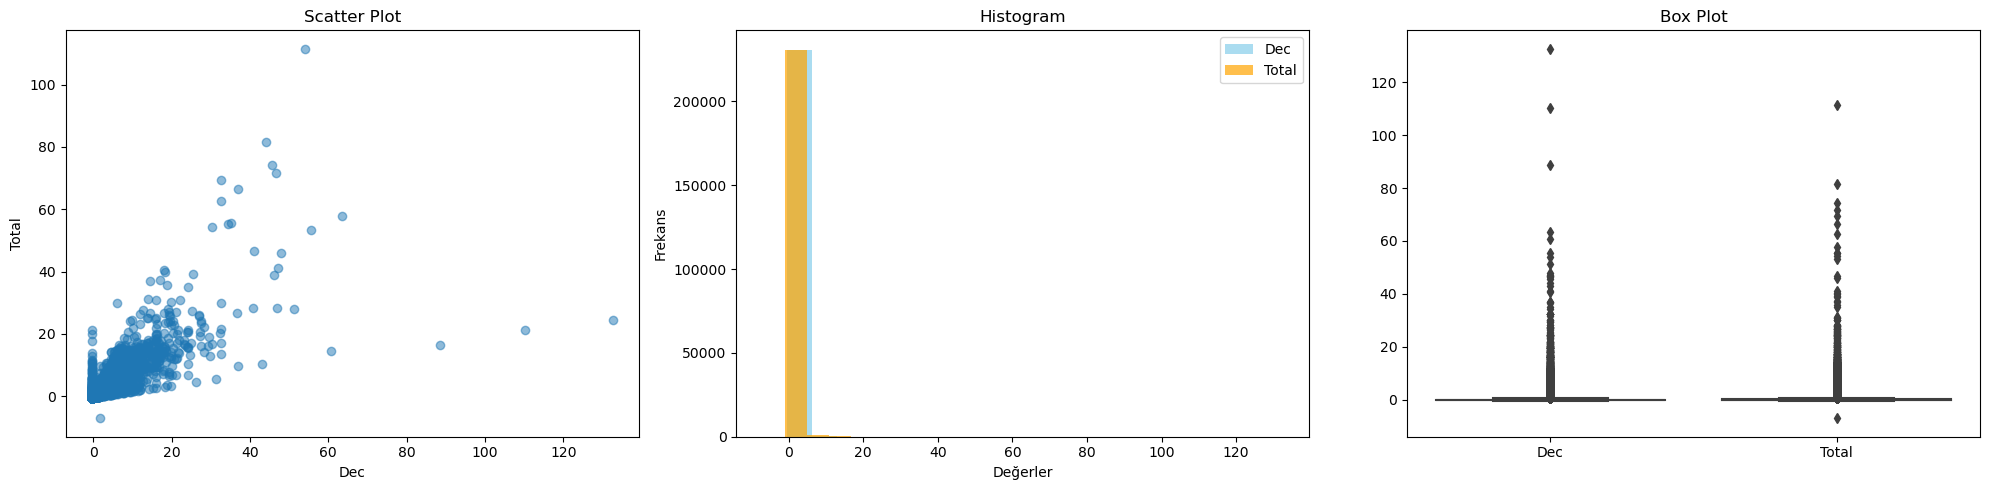

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# Grafikleri oluşturma
plt.figure(figsize=(20, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['Dec'], data['Total'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Dec')
plt.ylabel('Total')

# Histogram
plt.subplot(1, 3, 2)
plt.hist(data['Dec'], bins=20, color='skyblue', alpha=0.7, label='Dec')
plt.hist(data['Total'], bins=20, color='orange', alpha=0.7, label='Total')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=data[['Dec', 'Total']])
plt.title('Box Plot')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import joblib

# Veri setini yükle
data = pd.read_excel('yeni_ozellik_veriseti.xlsx')

#boşlukları doldurma
data = data.fillna(data.mean(numeric_only=True))

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop('Total', axis=1)
y = data['Total']

# Kullanılacak modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet()
}

# Her model için performansı değerlendir ve en iyisini seç
best_model = None
best_score = float('-inf')
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    mean_r2 = cv_scores.mean()
    print(f"{name} cross-validation mean R^2 score:", mean_r2)
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = model

# En iyi modeli eğit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
best_model.fit(X_train, y_train)

# Eğitim setinde performansı değerlendir
train_predictions = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = sqrt(train_mse)
print("\nEğitim Seti Performansı:")
print("R^2 değeri:", train_r2)
print("MSE (Ortalama Kare Hata):", train_mse)
print("MAE (Ortalama Mutlak Hata):", train_mae)
print("RMSE (Kök Ortalama Kare Hata):", train_rmse)

# Test setinde performansı değerlendir
test_predictions = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = sqrt(test_mse)
print("\nTest Seti Performansı:")
print("R^2 değeri:", test_r2)
print("MSE (Ortalama Kare Hata):", test_mse)
print("MAE (Ortalama Mutlak Hata):", test_mae)
print("RMSE (Kök Ortalama Kare Hata):", test_rmse)

# En iyi modeli kaydet
joblib.dump(best_model, 'best_model_isedataset_regression.pkl')

Linear Regression cross-validation mean R^2 score: 0.9811298433008353
Ridge Regression cross-validation mean R^2 score: 0.9811315758570348
Lasso Regression cross-validation mean R^2 score: -1.712681633423801
ElasticNet Regression cross-validation mean R^2 score: 0.025675992895287436

Eğitim Seti Performansı:
R^2 değeri: 0.9992511054170601
MSE (Ortalama Kare Hata): 0.000767196310034215
MAE (Ortalama Mutlak Hata): 0.00816377683473968
RMSE (Kök Ortalama Kare Hata): 0.02769830879375517

Test Seti Performansı:
R^2 değeri: 0.9991276819063145
MSE (Ortalama Kare Hata): 0.0007869996784325744
MAE (Ortalama Mutlak Hata): 0.008217721828105783
RMSE (Kök Ortalama Kare Hata): 0.028053514546890097


['best_model_isedataset_regression.pkl']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleme
veri = pd.read_excel('yeni_ozellik_veriseti.xlsx')

# İlgilenilen sütunları seçin
sütun1 = 'Jan'
sütun2 = 'Total'

# Keman Grafiği çizin
plt.figure(figsize=(8, 6))
sns.violinplot(x=veri[sütun1], y=veri[sütun2])
plt.title(f'{sütun1} ve {sütun2} Dağılımı')
plt.xlabel(sütun1)
plt.ylabel(sütun2)
plt.show()
